### Introduction
Consider to solve 1D wave equation in the domain of $(0 \leq x \leq L)\times(0 \leq t \leq T)$ with various material propeties:
$$ \rho(x) \frac{\partial {^2 u(x,t)}}{\partial{t^2}} = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] $$

where $c$ is the wave velocity. <br/>
Free boundary condition at $x=0$:
$$\frac{\partial }{\partial x} u(x=0, t) = 0$$
Absorbing boundary condition at at $x=L$: 
$$c\frac{\partial}{\partial x}u(x=L, t) + \frac{\partial}{\partial t}u(x=L, t) = 0$$
Initial conditions at $t=0$:
$$u(x, t=0) = 0, \frac{\partial{u(x, t=0)}}{\partial{t}} = 0$$
Forced vibration at $x\in[x_f, x_f+h_p]$: $T(x, t) = E(x)S(x, t) - e_{33} \mathscr{E}(x,t)$, combined with $\partial T(x) / \partial x = \rho(x) \partial {^2 u(x,t)} / \partial{t^2}$ produces

$$\rho(x) \frac{\partial {^2 u(x,t)}}{\partial{t^2}} = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] - e_{33} \frac{\partial \mathscr{E}(x,t)}{\partial x} $$

Observed signal is the open-circuit voltage difference between $x=x_f$ and $x=x_f$: $V_{oc}(t) = - \int_{x_f}^{x_f+h_p} E(x,t) dx$

Note that for open-circuit sensing: <br/>
$D_{33}(x,t) = e_{33}S(x,t) + \epsilon_{33} \mathscr{E}(x,t) = 0$ <br/>
$\rightarrow \mathscr{E}(x,t) = -e_{33}S(x,t) / \epsilon_{33} $ <br/>
$ \rightarrow V_{oc}(t) = \int_{x_f}^{x_f+h_p}e_{33}S(x,t) / \epsilon_{33}dx = e_{33}[u(x_f+h_p,t)-u(x_f,t)] / \epsilon_{33}$. <br/>
Considering loading capacitor, the actual voltage is scaled by $\eta<1$:
$$V_{oc}(t) = \frac{\eta e_{33}} {\epsilon_{33}} [u(x_f+h_p,t)-u(x_f,t)]$$

### Finite Difference
Now descretize both space and time with step of $\Delta x$ and $\Delta t$, respectively. Then the second-order derivatives can be replaced by central differences:
$$\frac{\partial ^2}{\partial t^2}u(x_m,t_n) \approx \frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2}$$
$$\frac{\partial ^2}{\partial x^2}u(x_m,t_n) \approx \frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2}$$
$$\frac{\partial}{\partial x}u(x_m,t_n) \approx \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x}$$
where $m=1,2,...,M-1, n=2,...,N$. Note that:
$$ \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] = E(x)\frac{\partial ^2 u(x,t)}{\partial x^2} + \frac{\partial E(x)}{\partial x} \frac{\partial {u(x,t)}}{\partial{x}}$$
The wave equation becomes:
$$\rho_m\frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2} = E(x_m)\frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{2\Delta x} \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x}$$

Which produces with $c_m=\sqrt{E_m/\rho_m}, c_{m-1}c_m \approx E_{m-1}/\rho_m, c_{m}c_{m+1} \approx E_{m+1}/\rho_m,r_m=c_m(\Delta t/\Delta x)$:

$$u^{n+1}_m = \left(r^2_m - \frac{-r_{m-1}r_m + r_{m}r_{m+1}}{4}\right) u^n_{m-1} + (2-2r^2_m)u^n_m + \left(r^2_m + \frac{-r_{m-1}r_m + r_{m}r_{m+1}}{4}\right) u^n_{m+1} - u^{n-1}_m$$

Now substitue the first-oder derivatives with difference:
$$\frac{\partial}{\partial t}u(x_m,t_n) \approx \frac{-u^{n}_m + u^{n+1}_m}{\Delta t} $$
$$\frac{\partial}{\partial x}u(x_m,t_n) \approx \frac{-u^n_{m-1} + u^{n}_{m}}{\Delta x} \approx \frac{-u^n_{m} + u^{n}_{m+1}}{\Delta x}$$
We can obtain: <br/>
Free boundary condition at $x=0$: $u^n_{0}=u^n_1$; <br/>
Absorbing boundary condition at $x=L$: $u^{n+1}_M= ru^n_{M-1} + (1-r) u^n_{M} $; <br/>
Initial condition at $t=0$: $u^{0}_m=0, u^{1}_m= u^{0}_m$. <br/>
Excitation condition $m \in [f_1, f_2] = [f, f+h_p/\Delta x]$: 

$$ \rho_m\frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2} = E(x_m)\frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{2\Delta x} \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x} - e_{33} \frac{-\mathscr{E}^n_{m-1} + \mathscr{E}^n_{m+1}}{2\Delta x}$$
Note that $ \mathscr{E}^n_{m} = V^n/h_p $ if $m \in [f_1, f_2]$, else $0$. Also note that $ e_{33} = Ed_{33}$, the contribution of last term to the FD equation becomes: <br/>
$p_1 = -d_{33} r^2_m V^n \Delta x / 2 h_p$ when $m=f_1$ <br/>
$p_2 = d_{33} r^2_m V^n \Delta x / 2 h_p$ when $m=f_2$ <br/>

For speeding up computation, we want to express the above equations in Matrix formula:
$$\mathbf{u}^{n+1} = \mathbf{Ku}^{n}+\mathbf{Du}^{n-1} + \mathbf{F}^{n}$$
where $n>0$, $\mathbf{u}^{n}=[u^n_0, u^n_1, u^n_2, \cdots, u^n_M]^T$, $\mathbf{D}=diag[1,1,1,\cdots,1,0]$, $\mathbf{F}{n}=[0,0,\cdots,0,p_1,0,\cdots,0,p_2,0,\cdots,0]$, and
$$ \mathbf{K} = \begin{bmatrix}
r^2_1-\frac{-r_0+r_2}{4}r_1   &   2-2r^2_1   & r^2_1+\frac{-r_0+r_2}{4}r_1  &  & &\\
r^2_1-\frac{-r_0+r_2}{4}r_1 & 2-2r^2_1 & r^2_1+\frac{-r_0+r_2}{4}r_1 &  & &\\
& r^2_2-\frac{-r_1+r_3}{4}r_2   & 2-2r^2_2 & r^2_2-\frac{-r_1+r_3}{4}r_2 &  &\\
& & \ddots & \ddots & \ddots & \\
& & & r^2_{M-1}-\frac{-r_{M-2}+r_M}{4}r_{M-1} & 2-2r^2_{M-1} & r^2_{M-1}+\frac{-r_{M-2}+r_M}{4}r_{M-1} \\
& & & 0  & r_M & 1-r_M
\end{bmatrix}
$$

### Stability
In order to be numerically stable, $r<1$ shall be satisfied! <br>
[reference](https://hplgit.github.io/num-methods-for-PDEs/doc/pub/wave/pdf/wave-4print-A4-2up.pdf)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
L = 500 # um
dx = 1 # um
Nx = int(L/dx)
xgrid = np.arange(0, Nx+1)*dx

c = 1000 # m/s
T = 2 # us
dt = 0.5*dx/c # us
Nt = int(T/dt)
tgrid = np.arange(0, Nt+1)*dt
r = c*dt/dx

# construct K matrix
dd = np.ones((Nx+1,1))
dd[-1] = 0
v = r**2*np.ones_like(xgrid)
v[0], v[-1] = 0, 0
v2 = 2-2*v
v2[0], v2[-1] = 0, 0
K = np.diag(v2) + np.diag(v[1:],k=-1) + np.diag(v[:-1],k=1)
K[0,0] = r**2
K[0,1] = 2-2*r**2
K[0,2] = r**2
K[-1,-2] = r
K[-1,-1] = -r + 1
print("K = \n",K) # check whether K is right

K = 
 [[0.25 1.5  0.25 ... 0.   0.   0.  ]
 [0.25 1.5  0.25 ... 0.   0.   0.  ]
 [0.   0.25 1.5  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.5  0.25 0.  ]
 [0.   0.   0.   ... 0.25 1.5  0.25]
 [0.   0.   0.   ... 0.   0.5  0.5 ]]


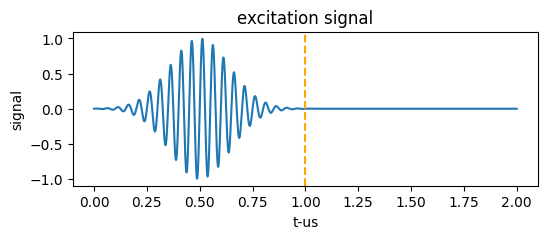

In [6]:
# plot excitation signal
t0 = 1 # us
n0 = int(t0/dt)
xf = 250 # um
mf = int(xf/dx)
xr = 150 # ums
mr = int(xr/dx)

freq = 20 # MHz
def f(t):
    return np.exp(-(t-t0/2)**2/(0.2*t0)**2)*np.sin(2*np.pi*freq*t)
#     return np.exp(-(t-t0/2)**2/(0.1*t0)**2)

exc_sig = f(tgrid)
fig = plt.figure(figsize=[6,2])
plt.plot(tgrid, exc_sig)
plt.axvline(x=t0, color='orange', linestyle='--')
plt.xlabel('t-us')
plt.ylabel('signal')
plt.title('excitation signal')
plt.show()

In [35]:
# core finite different algorithm
def get_next(u_curr, u_prev, n):
    # n = index of u_curr
    u_next = K@u_curr - dd*u_prev
    if n+1<=n0:
        u_next[mf, 0] = exc_sig[n+1]
    return u_next

def wave_1d(u_ini):
    u_prev = u_ini
    u_curr = u_ini
    
    # apply excitation signal
    u_prev[mf, 0] = exc_sig[0]
    u_curr[mf, 0] = exc_sig[1]
    
    U = []
    U.append(u_prev)
    U.append(u_curr)
    for n in range(1, Nt):
        u_next = get_next(u_curr, u_prev, n)
        u_prev = u_curr
        u_curr = u_next
        
        U.append(u_next)
    
    U = np.concatenate(U, axis=1)
    ur = U[mr, :]
    
    return U, ur

In [36]:
# solve wave 1d
u_ini = np.zeros((Nx+1, 1)) # column vector

U, ur = wave_1d(u_ini)

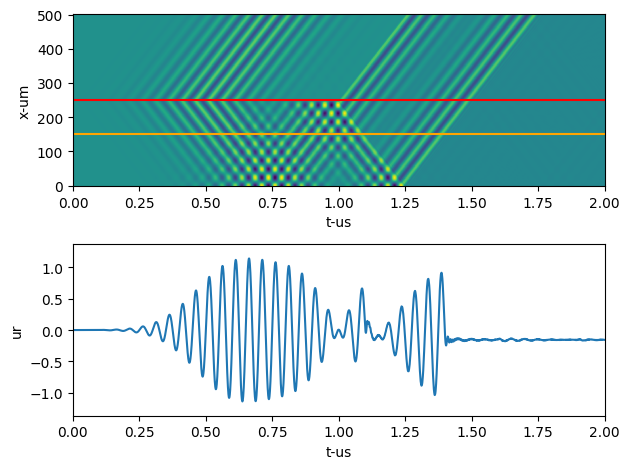

In [37]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolor(tt,xx,U)
ax[0].axhline(y=xf, color='r', linestyle='-')
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')

ax[1].plot(tgrid, ur)
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
fig.tight_layout()

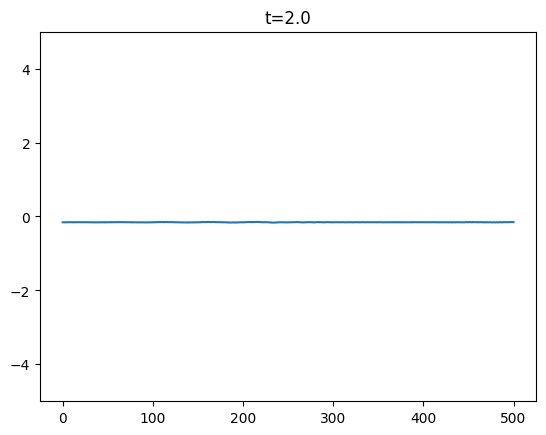

In [39]:
# wave propagation in spacextime
import time
from IPython import display

for i in range(0,Nt+1, 50):
    try:
        display.clear_output(wait=True)
        plt.plot(xgrid, U[:, i])
        plt.ylim((-5, 5))
        plt.title(f't={tgrid[i]}')
        plt.show()
    except KeyboardInterrupt:
        break